--2024-12-20 16:26:58--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip [following]
--2024-12-20 16:26:58--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip [following]
--2024-12-20 16:26:58--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip
Resolving raw.githubusercontent.com (raw.githubuserco

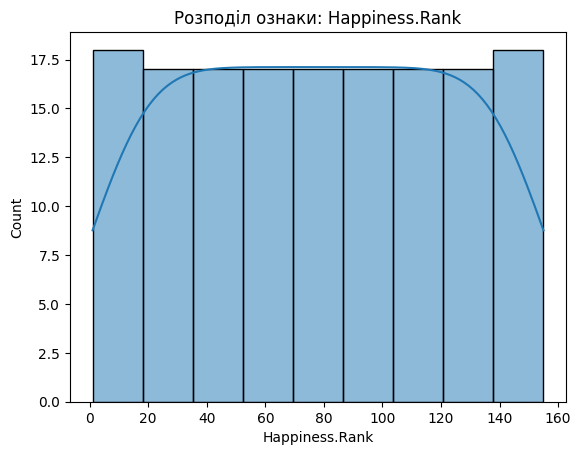

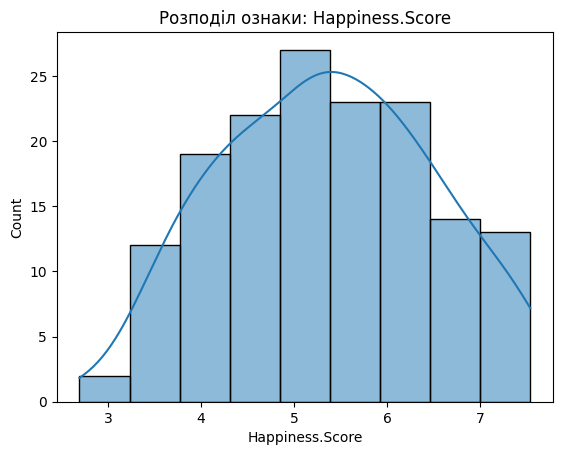

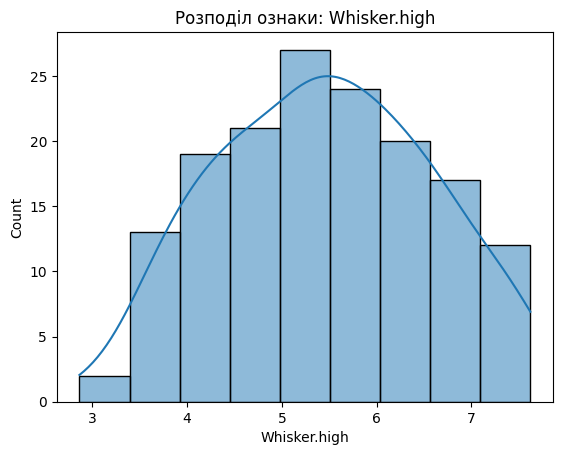

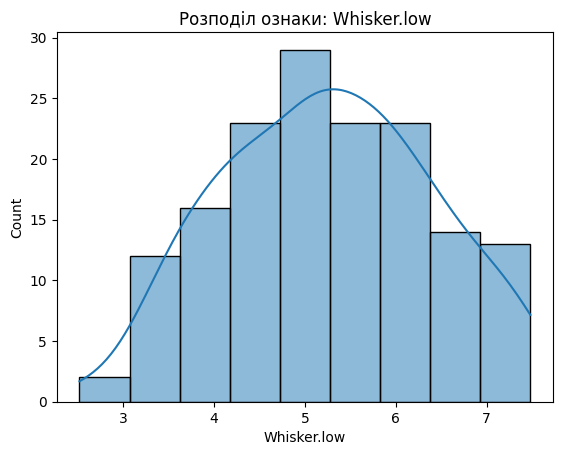

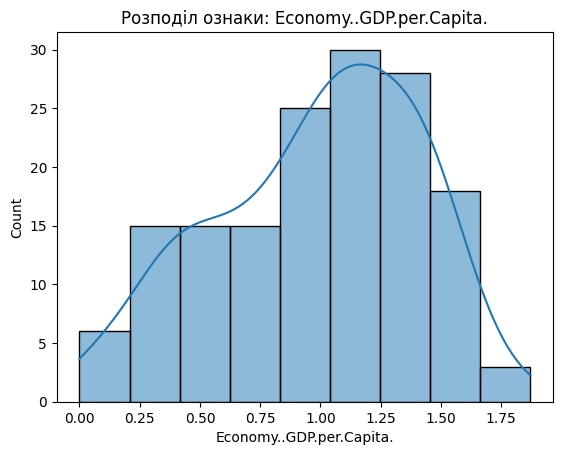

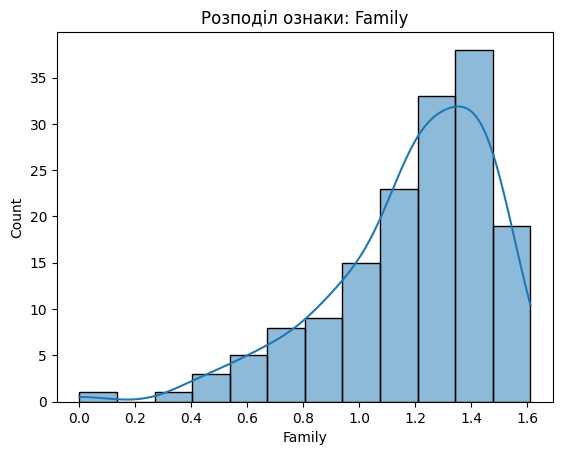

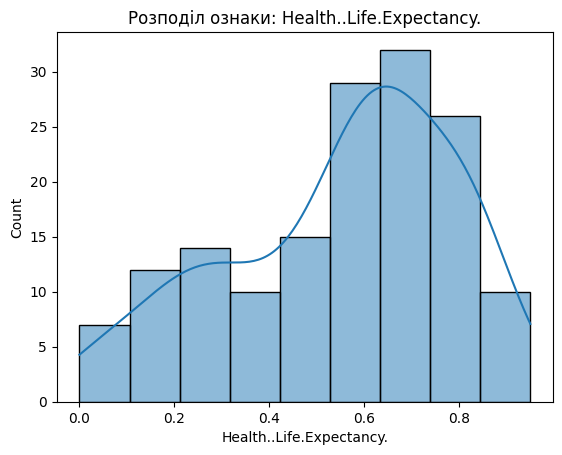

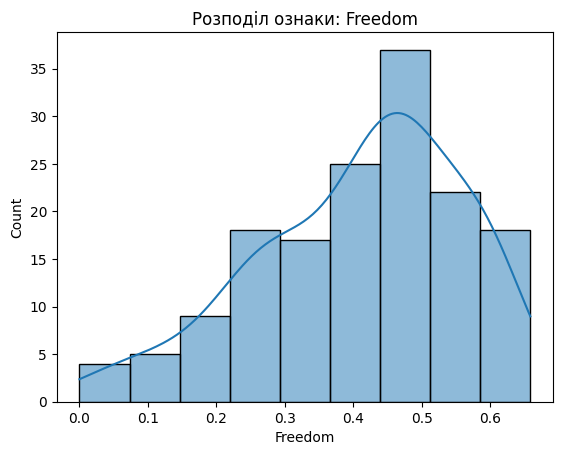

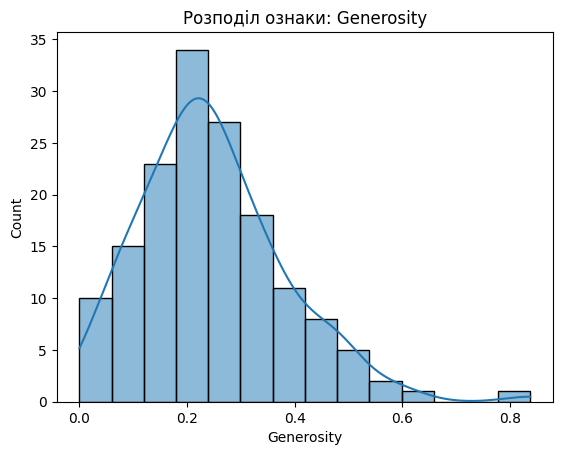

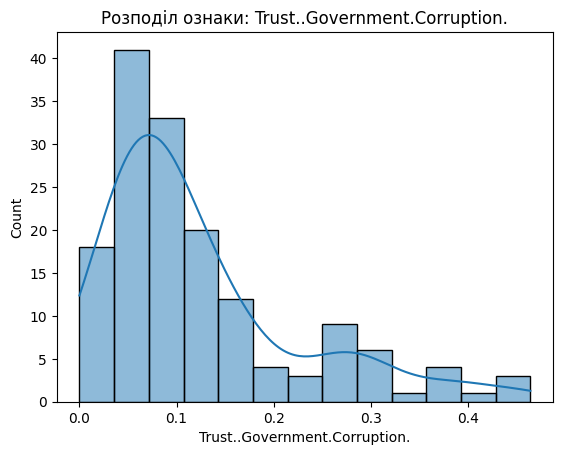

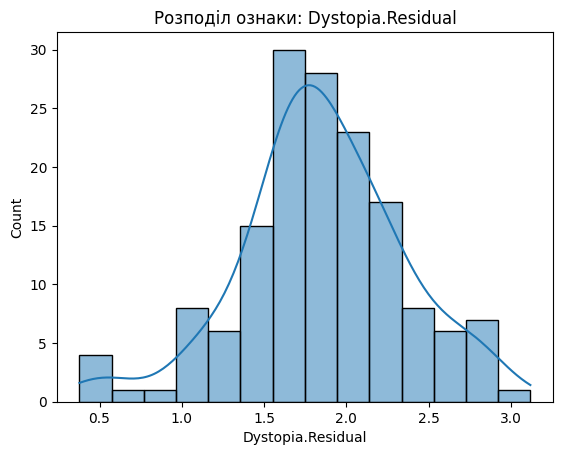

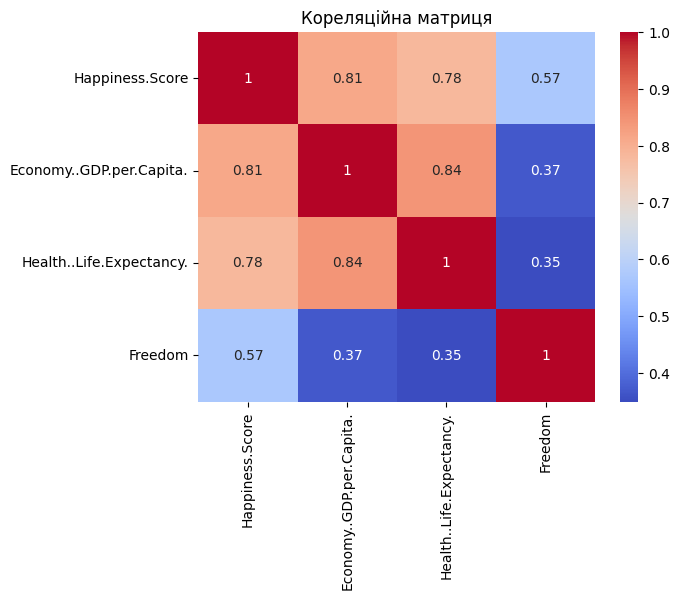

Кореляційна матриця показує, що ознаки мають різну силу лінійного зв'язку.



Стандартизовані дані:
       Happiness.Score  Economy..GDP.per.Capita.  Health..Life.Expectancy.  \
count     1.550000e+02              1.550000e+02              1.550000e+02   
mean     -2.750488e-16             -2.750488e-16             -2.292073e-16   
std       1.003241e+00              1.003241e+00              1.003241e+00   
min      -2.359949e+00             -2.347736e+00             -2.333157e+00   
25%      -7.525169e-01             -7.661470e-01             -7.679616e-01   
50%      -6.653176e-02              1.903992e-01              2.314821e-01   
75%       6.629099e-01              7.946657e-01              7.264573e-01   
max       1.935996e+00              2.112488e+00              1.684893e+00   

            Freedom  
count  1.550000e+02  
mean   2.750488e-16  
std    1.003241e+00  
min   -2.734123e+00  
25%   -7.030094e-01  
50%    1.917450e-01  
75%    7.208448e-01  
max    1.668506e+00  

Статистики оригінальних даних:
       Happiness.Score  Economy..GDP.per.Cap

=== Висновки ===

1. Попередня обробка даних:
Після завантаження даних ми виконали попередній аналіз типів та статистик. Дані містять числові та категоріальні ознаки,
що добре підходить для аналізу та кластеризації. Розподіли числових ознак виявили, що не всі з них відповідають нормальному
закону розподілу, тому стандартизація стала необхідною.

2. Кореляційний аналіз:
Кореляційна матриця вказує на значний зв'язок між показником 'Happiness.Score' і такими ознаками, як 'Economy..GDP.per.Capita.'
та 'Health..Life.Expectancy.'. Це очікувано, адже економічне становище та здоров'я населення є ключовими факторами для рівня щастя.

3. Карта розподілу рівня щастя:
Карта показала географічний розподіл показників рівня щастя. Найвищі показники демонструють країни Північної Європи,
тоді як країни Африки мають значно нижчі значення.

4. Стандартизація даних:
Стандартизація дозволила вирівняти масштаби числових ознак, що є критичним для коректної роботи алгоритму GaussianMixture.
Порівняння статист

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import zipfile
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.mixture import GaussianMixture

# Завантаження даних
!wget -O WorldHappinessReport.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true

# Перевірка наявності та розпакування
if not os.path.exists("2015.csv") or not os.path.exists("2016.csv") or not os.path.exists("2017.csv") or not os.path.exists("2018.csv"):
    with zipfile.ZipFile("WorldHappinessReport.zip", 'r') as zip_ref:
        zip_ref.extractall()
else:
    print("Файли вже існують. Пропускаємо розпакування.")

# Завантаження конкретного файлу
data = pd.read_csv("2017.csv")

# Інформація про дані
print("Інформація про дані:")
print(data.info())
print("\nСтатистики даних:")
print(data.describe())

# Візуалізація розподілу числових ознак
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    sns.histplot(data[column], kde=True)
    plt.title(f"Розподіл ознаки: {column}")
    plt.show()

# Кореляційна матриця
selected_columns = ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom']
correlation_matrix = data[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця")
plt.show()

# Висновок про зв'язки між ознаками
print("Кореляційна матриця показує, що ознаки мають різну силу лінійного зв'язку.")

# Відображення розподілу цільової ознаки
fig = px.choropleth(data,
                    locations="Country",
                    color="Happiness.Score",
                    locationmode="country names")
fig.update_layout(title="Happiness Index 2017")
fig.show()

# Стандартизація даних
def data_scale(data, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'std':
        scaler = StandardScaler()
    elif scaler_type == 'norm':
        scaler = Normalizer()

    scaled_data = scaler.fit_transform(data)
    return scaled_data

original_dataframe = data[selected_columns]
data_scaled = data_scale(original_dataframe, scaler_type='std')
df_scaled = pd.DataFrame(data_scaled, columns=selected_columns)
print("\nСтандартизовані дані:")
print(df_scaled.describe())

# Порівняння статистик
print("\nСтатистики оригінальних даних:")
print(original_dataframe.describe())
print("\nСтатистики стандартизованих даних:")
print(df_scaled.describe())

# Модель кластеризації
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(data_scaled)
data['Cluster'] = clusters

# Теплова мапа для кластерів
fig = px.choropleth(data,
                    locations="Country",
                    color="Cluster",
                    locationmode="country names")
fig.update_layout(title="Розподіл країн за кластерами")
fig.show()

# Вплив різних ознак
additional_columns = ['Generosity', 'Trust..Government.Corruption.']
selected_columns_with_additional = selected_columns + additional_columns
data_scaled_with_additional = data_scale(data[selected_columns_with_additional], scaler_type='std')
clusters_with_additional = gmm.fit_predict(data_scaled_with_additional)
data['Cluster_with_additional'] = clusters_with_additional

# Друга теплова мапа
fig = px.choropleth(data,
                    locations="Country",
                    color="Cluster_with_additional",
                    locationmode="country names")
fig.update_layout(title="Розподіл країн за кластерами (з додатковими ознаками)")
fig.show()

# Висновки
print("=== Висновки ===\n")

print("1. Попередня обробка даних:")
print("Після завантаження даних ми виконали попередній аналіз типів та статистик. Дані містять числові та категоріальні ознаки,")
print("що добре підходить для аналізу та кластеризації. Розподіли числових ознак виявили, що не всі з них відповідають нормальному")
print("закону розподілу, тому стандартизація стала необхідною.\n")

print("2. Кореляційний аналіз:")
print("Кореляційна матриця вказує на значний зв'язок між показником 'Happiness.Score' і такими ознаками, як 'Economy..GDP.per.Capita.'")
print("та 'Health..Life.Expectancy.'. Це очікувано, адже економічне становище та здоров'я населення є ключовими факторами для рівня щастя.\n")

print("3. Карта розподілу рівня щастя:")
print("Карта показала географічний розподіл показників рівня щастя. Найвищі показники демонструють країни Північної Європи,")
print("тоді як країни Африки мають значно нижчі значення.\n")

print("4. Стандартизація даних:")
print("Стандартизація дозволила вирівняти масштаби числових ознак, що є критичним для коректної роботи алгоритму GaussianMixture.")
print("Порівняння статистик оригінальних і стандартизованих даних показало, що середні значення і діапазони чисел були вирівняні.\n")

print("5. Кластеризація:")
print("За результатами моделі GaussianMixture країни було розподілено на три кластери. Використання додаткових ознак ('Generosity',")
print("'Trust..Government.Corruption.') вплинуло на результат кластеризації, що свідчить про важливість цих характеристик для формування груп.\n")

print("6. Висновок про вплив ознак:")
print("Додавання таких ознак, як 'Generosity' і 'Trust..Government.Corruption.', змінило розподіл країн між кластерами, що демонструє")
print("важливість цих характеристик у контексті рівня щастя. Це також підтверджує складність взаємозв'язків між різними ознаками.\n")

print("7. Загальний висновок:")
print("Проведена кластеризація дозволяє виявити групи країн із подібними характеристиками рівня щастя. Результати можуть бути корисними")
print("для урядів і міжнародних організацій, які планують політику, спрямовану на підвищення добробуту населення.\n")

